In [1]:
import os
import subprocess

import numpy as np
from pathlib import Path
import lossmaps as lm
import matplotlib.pyplot as plt

 If you are on SWAN and did not expect this warning, then restart and load the 'NXCals Pro' software stack.


In [2]:
path_pencilbeam = Path('/eos/user/l/lpauwels/ht_condor_sps_tracking_results/pencilbeam/horizontal_pencilbeam')
#path_blowup = Path('/eos/user/l/lpauwels/ht_condor_sps_tracking_results/blowup/studies')

path_blowup = Path('/eos/user/l/lpauwels/ht_condor_sps_tracking_results/blowup/run_29.01.2025/with_coll/')

In [3]:
def get_lossmap_paths(plane, path, file_name_base, file_addendum_name = ''):
    
    if plane not in ['H', 'V']:
        print(f'Incorrect plane: {plane}')
        return 1

    n_jobs = int(subprocess.check_output(f'find {path}/job* -maxdepth 0 -type d | wc -l', shell=True))
    n_jobs_succeeded = int(subprocess.check_output(f'find {path}/job* -maxdepth 0 -type d -not -empty | wc -l', shell=True))
    
    job_files_list = []
    for i in range(n_jobs):
        current_file_path = (subprocess.check_output(f'echo {path}/job_{i}/{file_name_base}_{plane}{file_addendum_name}.json', shell=True)).decode('ascii').strip()
        #current_file_path = (subprocess.check_output(f'echo {path}/job_{i}/{file_name_base}_{plane}.json', shell=True)).decode('ascii').strip()
        
        if os.path.exists(current_file_path):
            job_files_list.append(current_file_path)
    
    print(f'{n_jobs_succeeded} out of a total of {n_jobs} succeeded')
    if n_jobs_succeeded != len(job_files_list):
        print('ERROR: not all succeeded jobs paths were retrieved')
        
    return job_files_list

# Pencilbeam

399 out of a total of 400 succeeded


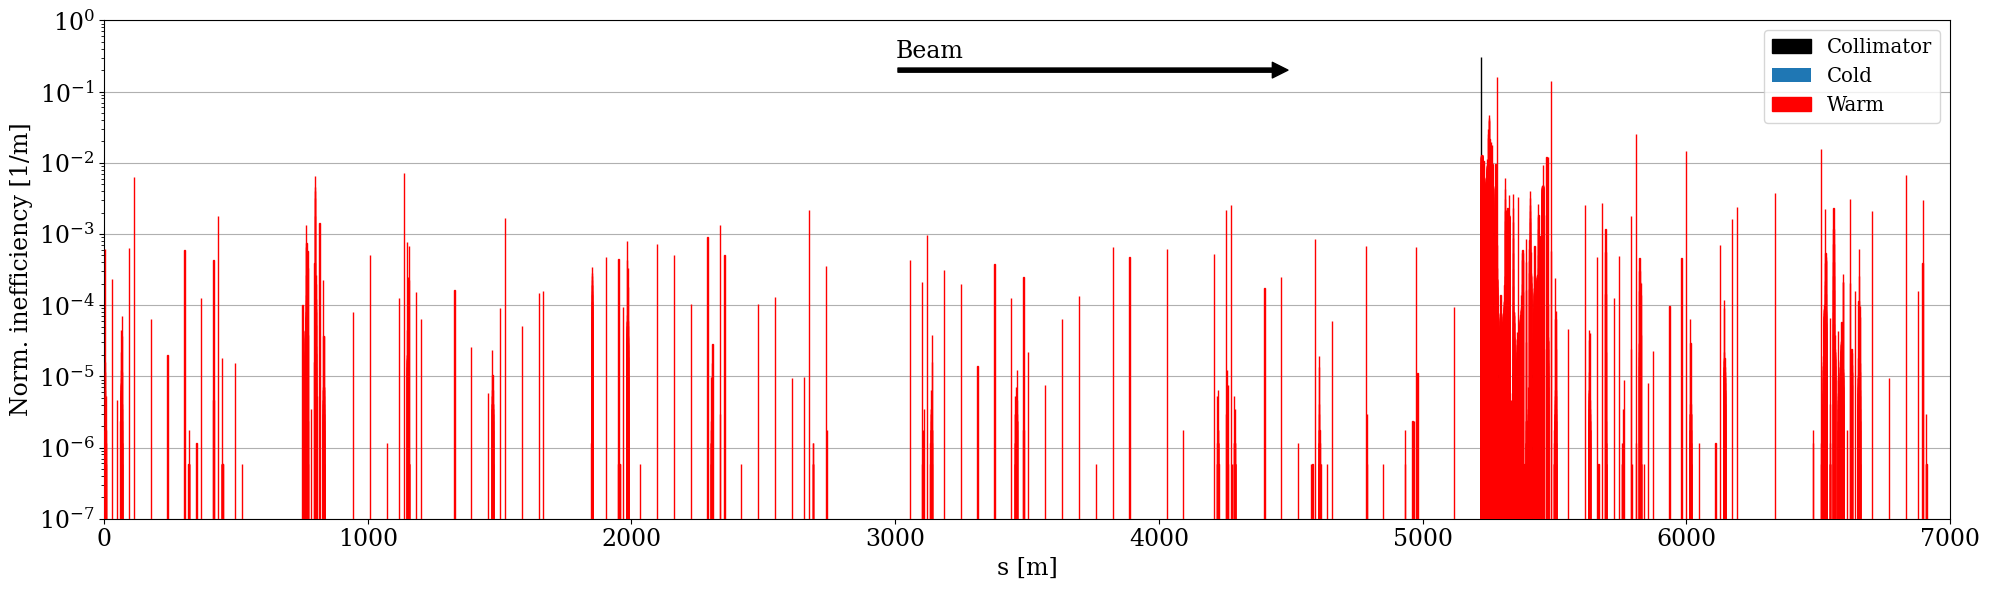

In [4]:
lms_pencilbeam = get_lossmap_paths('H', path_pencilbeam, 'pencilbeam_LM')

ThisLM = lm.SimulatedLossMap(lmtype=lm.LMType.B1H, machine=lm.Machine.SPS)
ThisLM.load_data_json(json_files=lms_pencilbeam)
fig = lm.plot_lossmap(ThisLM, xlim=(0,7000), show_zoom=False, ylim=[0.0000001,1], outfile='pencilbeam_lossmap2.png')
plt.show()

# Blowup with collimator

## Horizontal

In [7]:
lms_blowup = get_lossmap_paths('H', path_blowup, 'blowup_LM', '_adt_0.12')

7997 out of a total of 7999 succeeded
ERROR: not all succeeded jobs paths were retrieved


In [8]:
ThisLM2 = lm.SimulatedLossMap(lmtype=lm.LMType.B1H, machine=lm.Machine.SPS)
ThisLM2.load_data_json(json_files=lms_blowup)

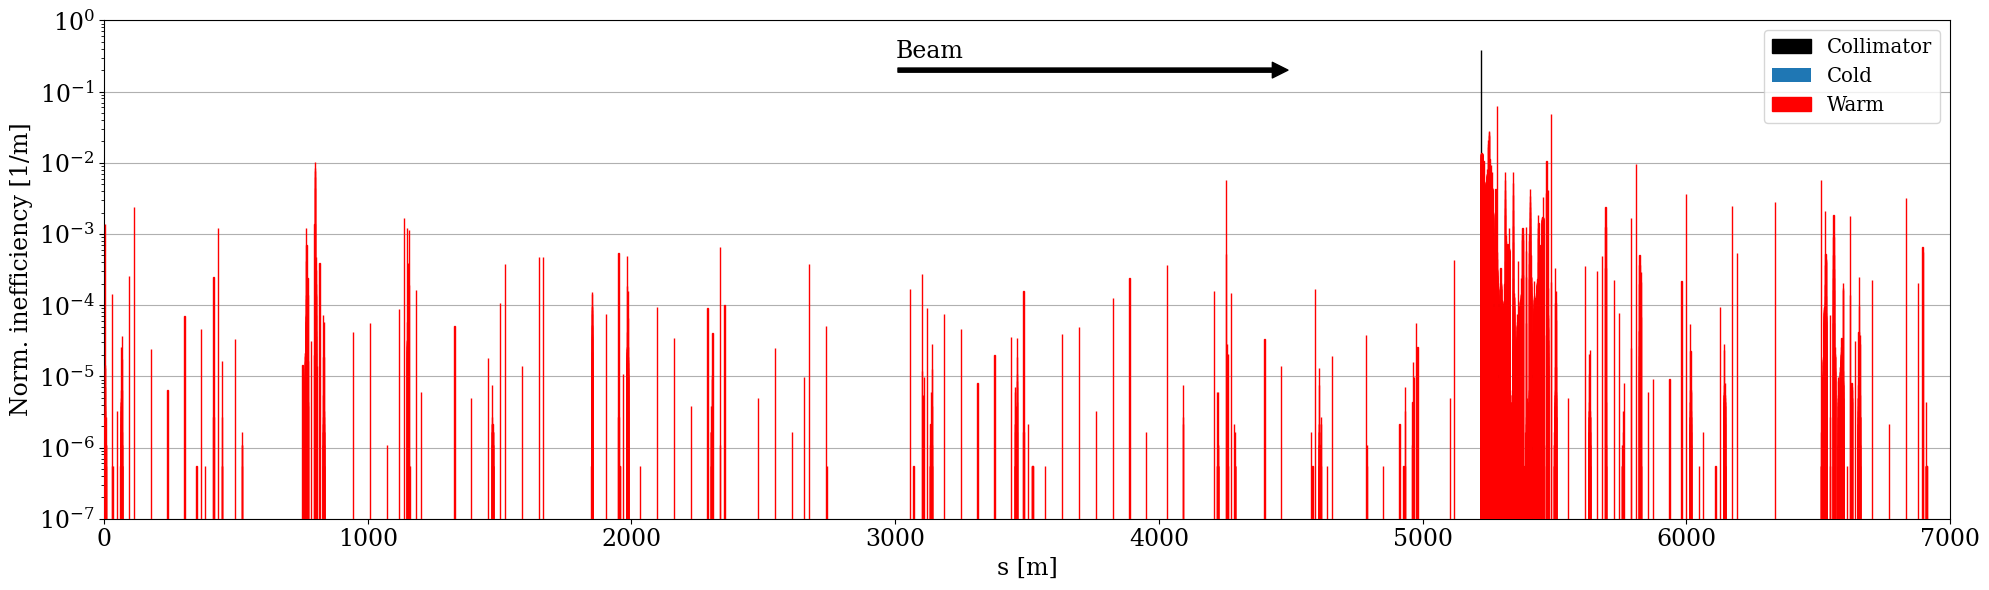

In [9]:
lm.plot_lossmap(ThisLM2, xlim=(0,7000), show_zoom=False, ylim=[0.0000001,1], outfile='blowup_lossmap_H_with_coll.png')
plt.show()

In [ ]:
line.track(part, turn_by_turn_monitor='ONE_TURN_EBE')

line.record_last_track

## Vertical

In [10]:
lms_blowup_v = get_lossmap_paths('V', path_blowup, 'blowup_LM', '_adt_0.12')

7997 out of a total of 7999 succeeded
ERROR: not all succeeded jobs paths were retrieved


In [18]:
ThisLM3 = lm.SimulatedLossMap(lmtype=lm.LMType.B1V, machine=lm.Machine.SPS)
ThisLM3.load_data_json(json_files=lms_blowup_v)

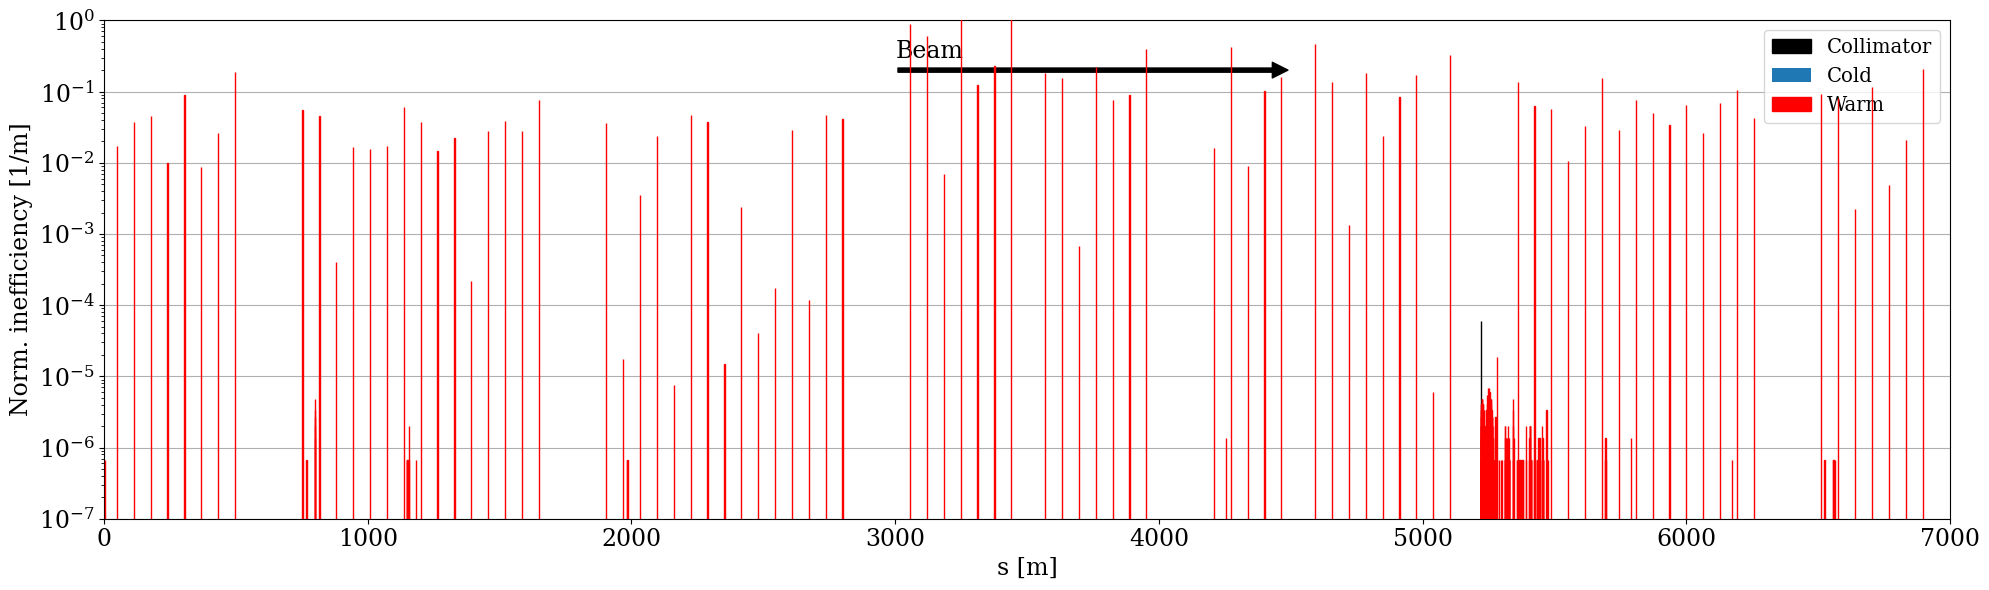

In [27]:
fig, ax = lm.plot_lossmap(ThisLM3, xlim=(0,7000), show_zoom=False, ylim=[0.0000001,1], outfile='blowup_lossmap_V_with_coll.png')
plt.savefig('blowup_lossmap_V_with_coll.png')
plt.show()

# Blowup without collimator

## Horizontal

In [20]:
path_blowup2 = Path('/eos/user/l/lpauwels/ht_condor_sps_tracking_results/blowup/run_29.01.2025/without_coll/')

In [21]:
lms_blowup_h2 = get_lossmap_paths('H', path_blowup2, 'blowup_LM', '_adt_0.12')

8000 out of a total of 8000 succeeded


In [23]:
ThisLM4 = lm.SimulatedLossMap(lmtype=lm.LMType.B1H, machine=lm.Machine.SPS)
ThisLM4.load_data_json(json_files=lms_blowup_h2[:4000])

/home/lpauwels/miniforge3/envs/xsuite_dev/lib/python3.11/site-packages/lossmaps/lossmap.py:860: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self._losses = pd.concat([ coll_df, aper_df ], ignore_index=True)


In [24]:
ThisLM4 = lm.SimulatedLossMap(lmtype=lm.LMType.B1H, machine=lm.Machine.SPS)
ThisLM4.load_data_json(json_files=lms_blowup_h2)

/home/lpauwels/miniforge3/envs/xsuite_dev/lib/python3.11/site-packages/lossmaps/lossmap.py:860: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self._losses = pd.concat([ coll_df, aper_df ], ignore_index=True)


/home/lpauwels/miniforge3/envs/xsuite_dev/lib/python3.11/site-packages/lossmaps/plot.py:797: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


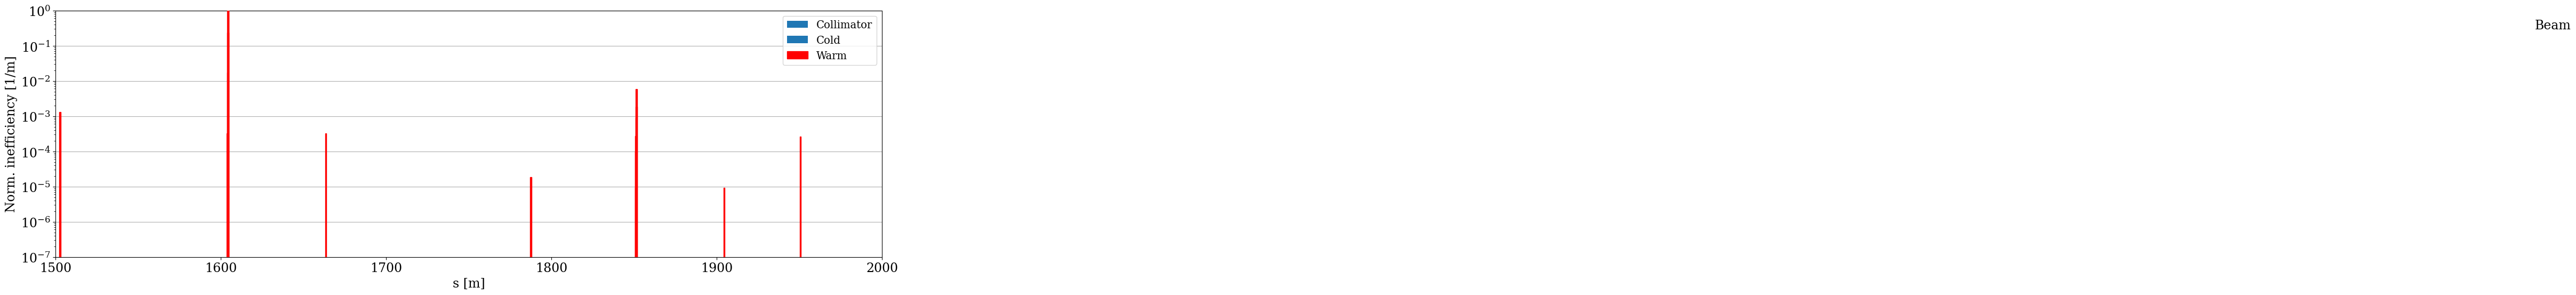

In [81]:
lm.plot_lossmap(ThisLM4, xlim=(1500,2000), show_zoom=False, ylim=[0.0000001,1], outfile='blowup_lossmap_H_without_coll.png')
plt.show()

## Vertical

In [26]:
lms_blowup_v2 = get_lossmap_paths('V', path_blowup2, 'blowup_LM', '_adt_0.12')

8000 out of a total of 8000 succeeded


In [28]:
ThisLM5 = lm.SimulatedLossMap(lmtype=lm.LMType.B1V, machine=lm.Machine.SPS)
ThisLM5.load_data_json(json_files=lms_blowup_v2)

/home/lpauwels/miniforge3/envs/xsuite_dev/lib/python3.11/site-packages/lossmaps/lossmap.py:860: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self._losses = pd.concat([ coll_df, aper_df ], ignore_index=True)


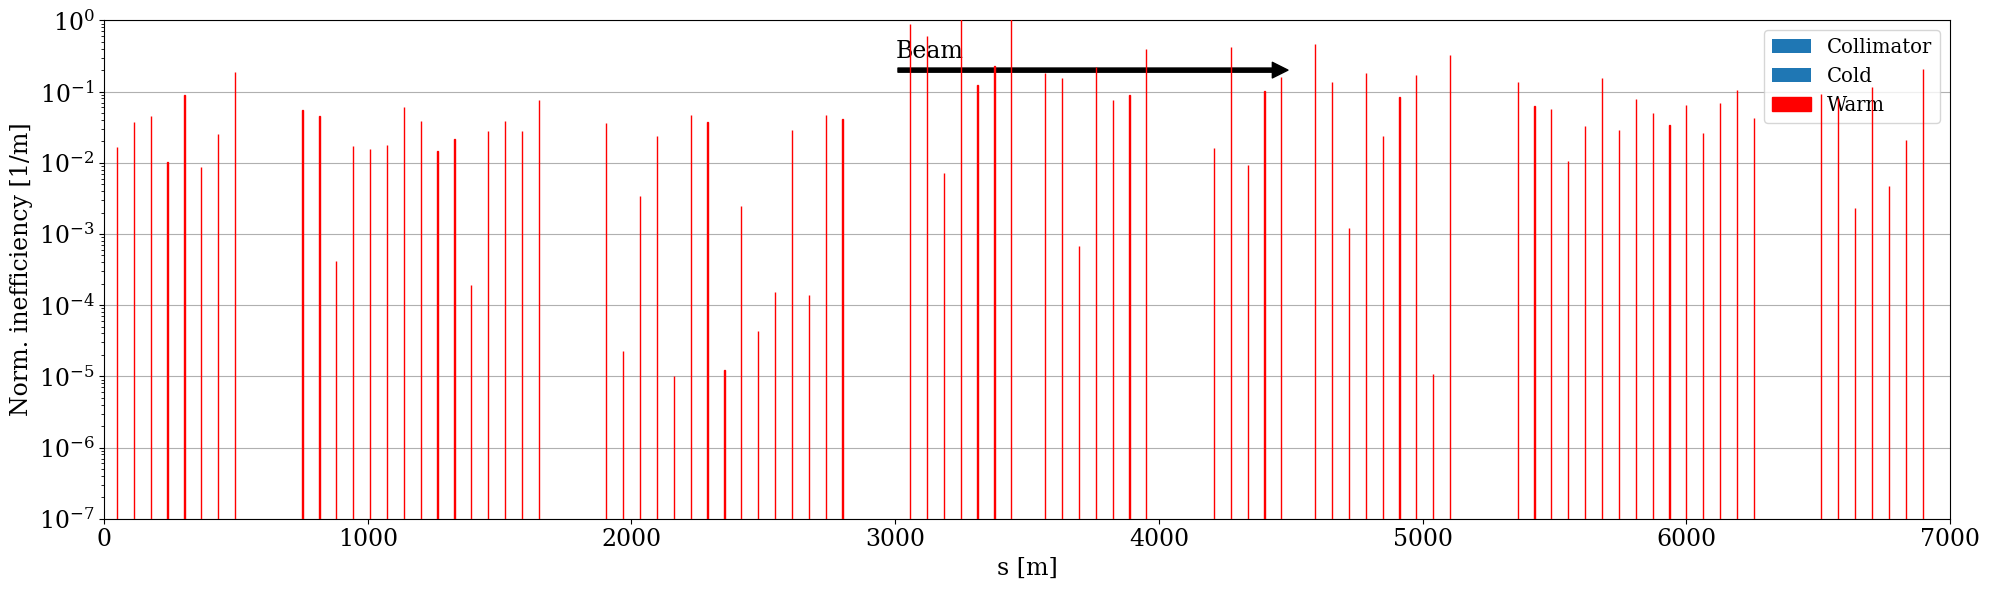

In [29]:
lm.plot_lossmap(ThisLM5, xlim=(0,7000), show_zoom=False, ylim=[0.0000001,1], outfile='blowup_lossmap_V_without_coll.png')
plt.show()

# Plotting aperture and twiss

## Extent functions

In [66]:
def get_ellipse_x_extent(el):
    if (np.abs(el._cos_rot_s) > 1 and np.abs(el._sin_rot_s) > 1) or (np.abs(el._sin_rot_s) < 0.00001):
        return -el.a + el.shift_x, el.a + el.shift_x
    
    else:
        t_max = np.arctan(-el.b/el.a * el._sin_rot_s/el._cos_rot_s)
        ext = el.a*np.cos(t_max)*el._cos_rot_s-el.b*np.sin(t_max)*el._sin_rot_s
        
        if ext < 0: 
            print('ERROR: ellipse extent is negatif')
            
        return -np.abs(ext) + el.shift_x, np.abs(ext) + el.shift_x
    
def get_rectangle_x_extent(el):
    if (np.abs(el._cos_rot_s) > 1 and np.abs(el._sin_rot_s) > 1) or (np.abs(el._sin_rot_s) < 0.00001):
        return el.min_x+ el.shift_x, el.max_x + el.shift_x
    else:
        w, h = el.max_x-el.min_x, el.max_y-el.min_y
        corners = np.array([[-w/2, -h/2],
                            [w/2, -h/2],
                            [w/2, h/2],
                            [-w/2, h/2]])
        
        rotation_matrix = np.array([
            [el._cos_rot_s, -el._sin_rot_s],
            [el._sin_rot_s,  el._cos_rot_s]
        ])
        
        rotated_corners = corners @ rotation_matrix.T
        
        min_x_val = np.min(rotated_corners[:,0])
        max_x_val = np.max(rotated_corners[:,0])
        
        return min_x_val + el.shift_x, max_x_val + el.shift_x
    
def get_rectellipse_x_extent(el):
    if (np.abs(el._cos_rot_s) > 1 and np.abs(el._sin_rot_s) > 1) or (np.abs(el._sin_rot_s) < 0.00001):
        ext = np.min([el.a, el.max_x])
        
        if ext < 0: 
            print('ERROR: ellipse extent is negatif')
        
        return -np.abs(ext) + el.shift_x, np.abs(ext) + el.shift_x
    
    else:
        #ellipse part
        t_max = np.arctan(-el.b/el.a * el._sin_rot_s/el._cos_rot_s)
        ext_ellipse = np.abs(el.a*np.cos(t_max)*el._cos_rot_s-el.b*np.sin(t_max)*el._sin_rot_s)
        
        #rectangle part
        corners = np.array([[-el.max_x, -el.max_y],
                            [el.max_x, -el.max_y],
                            [el.max_x, el.max_y],
                            [-el.max_x, el.max_y]])
    
        rotation_matrix = np.array([
            [el._cos_rot_s, -el._sin_rot_s],
            [el._sin_rot_s,  el._cos_rot_s]
        ])
        
        rotated_corners = corners @ rotation_matrix.T
        ext_rect = np.max(rotated_corners[:,0])
        if ext_rect < 0:
            print("ERROR: rectangle extent from rectellipse is negatif")
        
        ext = np.min([ext_ellipse, ext_rect])
        if ext < 0:
            print("ERROR: extent from rectellipse is negatif")
        
        return -np.abs(ext) + el.shift_x, np.abs(ext) + el.shift_x

def get_racetrack_x_extent(el):
    if (np.abs(el._cos_rot_s) > 1 and np.abs(el._sin_rot_s) > 1) or (np.abs(el._sin_rot_s) < 0.00001):
        return get_rectangle_x_extent(el)
    
    else:
        rotation_matrix = np.array([
                [el._cos_rot_s, -el._sin_rot_s],
                [el._sin_rot_s,  el._cos_rot_s]
            ])
        
        ellipse_centers = np.array([[el.min_x+el.a, el.min_y+el.b],
                                    [el.max_x -el.a, el.min_y + el.b],
                                    [el.max_x - el.a, el.max_y - el.b],
                                    [el.min_x + el.a, el.max_y - el.b]])
        
        ellipse_centers_rot = ellipse_centers @ rotation_matrix.T
        ellipses = np.array([xt.LimitEllipse(a= el.a, b=el.b, shift_x = ellipse_centers_rot[i,0], shift_y = ellipse_centers_rot[i,1], _cos_rot_s = el._cos_rot_s, _sin_rot_s = el._sin_rot_s) for i in range(4)])
        
        x_exts = []
        for ellipse in ellipses:
            x_min, x_max = get_ellipse_x_extent(ellipse)
            x_exts.append(np.array([x_min, x_max]))
        
        x_exts = np.array(x_exts)
            
        return np.min(x_exts[:,0]) + el.shift_x, np.max(x_exts[:,1]) + el.shift_x

In [67]:
def get_ellipse_y_extent(el):
    if (np.abs(el._cos_rot_s) > 1 and np.abs(el._sin_rot_s) > 1) or (np.abs(el._sin_rot_s) < 0.00001):
        return -el.b + el.shift_y, el.b + el.shift_y
    
    else:
        t_max = np.arctan(el.b/el.a * el._cos_rot_s/el._sin_rot_s)
        ext = el.a*np.cos(t_max)*el._sin_rot_s + el.b*np.sin(t_max)*el._cos_rot_s
        
        if ext < 0: 
            print('ERROR: ellipse extent is negatif')
            
        return -np.abs(ext) + el.shift_y, np.abs(ext) + el.shift_y
    
def get_rectangle_y_extent(el):
    if (np.abs(el._cos_rot_s) > 1 and np.abs(el._sin_rot_s) > 1) or (np.abs(el._sin_rot_s) < 0.00001):
        return el.min_y+ el.shift_y, el.max_y + el.shift_y
    else:
        w, h = el.max_x-el.min_x, el.max_y-el.min_y
        corners = np.array([[-w/2, -h/2],
                            [w/2, -h/2],
                            [w/2, h/2],
                            [-w/2, h/2]])
        
        rotation_matrix = np.array([
            [el._cos_rot_s, -el._sin_rot_s],
            [el._sin_rot_s,  el._cos_rot_s]
        ])
        
        rotated_corners = corners @ rotation_matrix.T
        
        min_y_val = np.min(rotated_corners[:,1])
        max_y_val = np.max(rotated_corners[:,1])
        
        return min_y_val + el.shift_y, max_y_val + el.shift_y
    
def get_rectellipse_y_extent(el):
    if (np.abs(el._cos_rot_s) > 1 and np.abs(el._sin_rot_s) > 1) or (np.abs(el._sin_rot_s) < 0.00001):
        ext = np.min([el.b, el.max_y])
        
        if ext < 0: 
            print('ERROR: ellipse extent is negatif')
        
        return -np.abs(ext) + el.shift_y, np.abs(ext) + el.shift_y
    
    else:
        #ellipse part
        t_max = np.arctan(el.b/el.a * el._cos_rot_s/el._sin_rot_s)
        ext_ellipse = el.a*np.cos(t_max)*el._sin_rot_s + el.b*np.sin(t_max)*el._cos_rot_s
        
        #rectangle part
        corners = np.array([[-el.max_x, -el.max_y],
                            [el.max_x, -el.max_y],
                            [el.max_x, el.max_y],
                            [-el.max_x, el.max_y]])
        
        rotation_matrix = np.array([
            [el._cos_rot_s, -el._sin_rot_s],
            [el._sin_rot_s,  el._cos_rot_s]
        ])
        
        rotated_corners = corners @ rotation_matrix.T
        ext_rect = np.max(rotated_corners[:,1])
        
        if ext_rect < 0:
            print("ERROR: rectangle extent from rectellipse is negatif")
        
        ext = np.min([ext_ellipse, ext_rect])
        if ext < 0:
            print("ERROR: extent from rectellipse is negatif")
        
        return -np.abs(ext) + el.shift_y, np.abs(ext) + el.shift_y

def get_racetrack_y_extent(el):
    if (np.abs(el._cos_rot_s) > 1 and np.abs(el._sin_rot_s) > 1) or (np.abs(el._sin_rot_s) < 0.00001):
        return get_rectangle_y_extent(el)
    
    else:
        rotation_matrix = np.array([
                [el._cos_rot_s, -el._sin_rot_s],
                [el._sin_rot_s,  el._cos_rot_s]
            ])
        
        ellipse_centers = np.array([[el.min_x+el.a, el.min_y+el.b],
                                    [el.max_x -el.a, el.min_y + el.b],
                                    [el.max_x - el.a, el.max_y - el.b],
                                    [el.min_x + el.a, el.max_y - el.b]])
        
        ellipse_centers_rot = ellipse_centers @ rotation_matrix.T
        ellipses = np.array([xt.LimitEllipse(a= el.a, b=el.b, shift_x = ellipse_centers_rot[i,0], shift_y = ellipse_centers_rot[i,1], _cos_rot_s = el._cos_rot_s, _sin_rot_s = el._sin_rot_s) for i in range(4)])
        
        y_exts = []
        for ellipse in ellipses:
            y_min, y_max = get_ellipse_y_extent(ellipse)
            y_exts.append(np.array([y_min, y_max]))
        
        y_exts = np.array(y_exts)
            
        return np.min(y_exts[:,0]) + el.shift_y, np.max(y_exts[:,1]) + el.shift_y

In [68]:
def get_x_extent(el):
    if el.__class__.__name__ == 'LimitRect':
        return get_rectangle_x_extent(el)
    
    elif el.__class__.__name__ == 'LimitEllipse':
        return get_ellipse_x_extent(el)
    
    elif el.__class__.__name__ == 'LimitRectEllipse':
        return get_rectellipse_x_extent(el)
    
    elif el.__class__.__name__ == 'LimitRacetrack':
        return get_racetrack_x_extent(el)

def get_y_extent(el):
    if el.__class__.__name__ == 'LimitRect':
        return get_rectangle_y_extent(el)
    
    elif el.__class__.__name__ == 'LimitEllipse':
        return get_ellipse_y_extent(el)
    
    elif el.__class__.__name__ == 'LimitRectEllipse':
        return get_rectellipse_y_extent(el)
    
    elif el.__class__.__name__ == 'LimitRacetrack':
        return get_racetrack_y_extent(el)

## Plot aperture

In [83]:
import xtrack as xt

In [69]:
line = xt.Line.from_json('injection_thin_approx_ap2.json')
#line = xt.Line.from_json('injection.json')

tab = line.get_table()
mask = [el.startswith('Limit') for el in tab.element_type]

Loading line from dict:   0%|          | 0/31427 [00:00<?, ?it/s]

Done loading line from dict.           


In [70]:
tw = line.twiss()

In [84]:
x_max_arr = np.array([get_x_extent(line[name])[1] for name in tab.name[mask]])
x_min_arr = np.array([get_x_extent(line[name])[0] for name in tab.name[mask]])

y_max_arr = np.array([get_y_extent(line[name])[1] for name in tab.name[mask]])
y_min_arr = np.array([get_y_extent(line[name])[0] for name in tab.name[mask]])

names_arr = np.array(tab.name[mask])
s_arr = np.array(tab.s[mask])

In [ ]:
exn = 3.5e-6
nrj = 21
pmass = 0.938

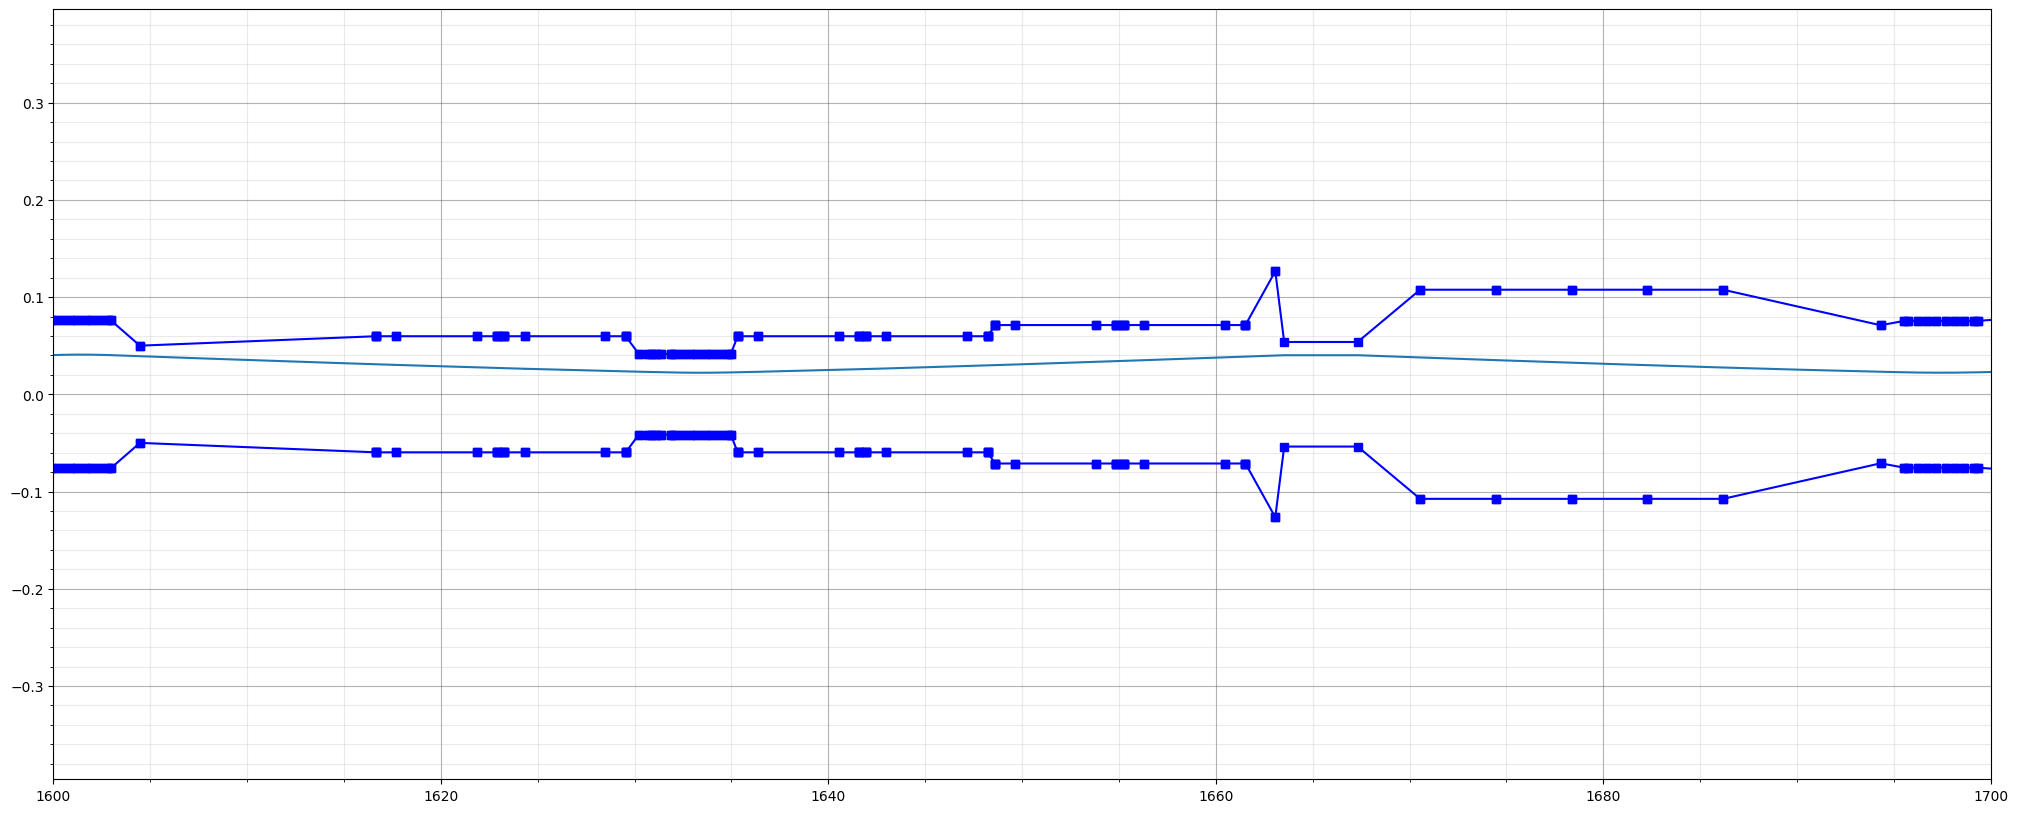

In [82]:
fig, ax = plt.subplots(1,1, figsize=(25,10))

ax.plot(s_arr, x_max_arr, 's-', markersize = 5.5,color='blue')
ax.plot(s_arr, x_min_arr, 's-', markersize = 5.5,color='blue')

ax.plot(tw.s, 10*np.sqrt(tw.betx*exn*pmass/nrj))

plt.xlim([1600,1700])
plt.minorticks_on()
plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.grid(visible=True, which='major', color='#666666', linestyle='-', alpha=0.5)
plt.show()

# Finding apertures with loss peaks

In [ ]:
ap_losses_tab = ThisLM2.aperture_losses
ineff_tab = ThisLM2.inefficiency()[['s', 'losses']]

In [ ]:
ineff_tab.loc[ineff_tab['losses']>4e-2]

,s,losses
69,548.3500,0.040181
471,5220.5916,0.375791
1086,5283.0500,0.063546
2385,5488.3500,0.048042


In [ ]:
ap_losses_tab.loc[ap_losses_tab['slos']>=5488]

,slos,name,nabs,dE,sbin
804,5488.332191,mba.52770_entry_aper_upstream,111.0,111.0,5488.35
805,5501.722950,lof.52802_exit_aper_downstream,1.0,1.0,5501.75
806,5632.746454,qf.53210..3_aper_upstream,1.0,1.0,5632.75
807,5661.549200,lod.53302_entry_aper_upstream,1.0,1.0,5661.55
808,5680.318391,mba.53370_entry_aper_upstream,2.0,2.0,5680.35
...,...,...,...,...,...
685736,6594.881793,mba.62630_entry_aper_upstream,1.0,1.0,6594.85
685737,6621.480300,lod.62702_entry_aper_upstream,5.0,5.0,6621.45
685738,6704.244891,mba.62970_entry_aper_upstream,2.0,2.0,6704.25
685739,6832.235691,mba.63370_entry_aper_upstream,8.0,8.0,6832.25


Three big peaks

mdhw_11732_aper_upstream: 548.364000

mbb.52130_entry_aper_upstream: 5283.055991

mba.52770_entry_aper_upstream: 5488.332191

In [ ]:
ap_losses_tab = ThisLM.aperture_losses

In [ ]:
ap_losses_tab[ap_losses_tab['nabs']>=100]

,slos,name,nabs,dE,sbin
358,5247.103300,mdh.52007_aper_upstream,130.0,130.0,5247.15
396,5250.798298,mba.52030_entry_aper_upstream,139.0,139.0,5250.75
397,5250.888295,mba.52030_entry_aper_upstream,166.0,166.0,5250.85
398,5250.978293,mba.52030_entry_aper_upstream,165.0,165.0,5250.95
399,5251.068291,mba.52030_entry_aper_upstream,209.0,209.0,5251.05
...,...,...,...,...,...
426084,5250.978293,mba.52030_entry_aper_upstream,127.0,127.0,5250.95
426085,5251.068291,mba.52030_entry_aper_upstream,178.0,178.0,5251.05
426303,5283.055991,mbb.52130_entry_aper_upstream,645.0,645.0,5283.05
426687,5488.332191,mba.52770_entry_aper_upstream,599.0,599.0,5488.35


## Line to run to get impacts

In [ ]:
impacts = xc.InteractionRecord.start(line=line, capacity=npart*3) 